# Central Operations Specialist - Arif Garayev Task - Data visualization

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [7]:
sample = pd.read_csv("/Users/garayev/Downloads/task.csv")

In [8]:
sample.head() # load first 5 rows

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
0,28.02.2020,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,€89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,€10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,€16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,€25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,€16.00,0.0,11.6


In [9]:
sample.tail() # load last 5 rows

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
99613,01.01.2020,Portugal,Lisbon,6070,Home Sweet Sushi - Miraflores,delivered,NaN,Sushi,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,3,€18.50,0.0,23.6
99614,01.01.2020,Portugal,Lisbon,8439,Yokohama,delivered,NaN,Sushi,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,€13.76,0.0,11.8
99615,01.01.2020,Portugal,Lisbon,11466,Burger King - Av. Roma,delivered,NaN,Burgers,ios,cashless,BANCO BIC PORTUGUES S.A.,3,€10.83,0.0,18.1
99616,01.01.2020,Portugal,Lisbon,11443,Don Costini Estefânia,delivered,NaN,Pizza,ios,cashless,BANCO SANTANDER TOTTA S.A.,1,€8.05,0.0,11.8
99617,01.01.2020,Portugal,Lisbon,10525,GRAIN - Vietnamese Eats - by Street Chow,delivered,NaN,Healthy,ios,cashless,CAIXA GERAL DE DEPOSITOS S.A.,2,€13.80,0.0,6.6


In [10]:
sample.shape # number of elements 

(99618, 15)

# Step 2: Check for the data information/type

In [11]:
sample.info() # consice summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Created Date           99618 non-null  object 
 1   Country                99618 non-null  object 
 2   City                   99618 non-null  object 
 3   Restaurant ID          99618 non-null  int64  
 4   Restaurant Name        99618 non-null  object 
 5   Order State            99618 non-null  object 
 6   Cancel Reason          1682 non-null   object 
 7   Cuisine                99291 non-null  object 
 8   Platform               87684 non-null  object 
 9   Payment Method         99618 non-null  object 
 10  Card Issuer            86906 non-null  object 
 11  Products in Order      99618 non-null  int64  
 12  Order Value € (Gross)  97936 non-null  object 
 13  Delivery Fee           97936 non-null  float64
 14  Delivery Time          97936 non-null  float64
dtypes:

In [12]:
sample.describe() # statistical data

,Restaurant ID,Products in Order,Delivery Fee,Delivery Time
count,99618.000000,99618.000000,97936.000000,97936.000000
mean,8956.555813,2.492893,0.260920,16.868691
std,2823.674685,1.959679,0.862061,11.838455
min,3571.000000,1.000000,0.000000,0.000000
25%,6637.000000,1.000000,0.000000,10.800000
50%,8390.000000,2.000000,0.000000,14.700000
75%,10529.000000,3.000000,0.000000,20.300000
max,16739.000000,49.000000,11.980000,1174.600000


In [13]:
sample.isnull().sum() # check for the missing values

Created Date                 0
Country                      0
City                         0
Restaurant ID                0
Restaurant Name              0
Order State                  0
Cancel Reason            97936
Cuisine                    327
Platform                 11934
Payment Method               0
Card Issuer              12712
Products in Order            0
Order Value € (Gross)     1682
Delivery Fee              1682
Delivery Time             1682
dtype: int64

# Step 3: Checking for the duplicated data

In [14]:
sample.duplicated().sum() # check the duplicated data

0

In [15]:
# we do not have any duplicates, otherwise we had to drop these data

In [17]:
sample.nunique() # display the unique data 

Created Date               59
Country                     2
City                        2
Restaurant ID             857
Restaurant Name           857
Order State                 3
Cancel Reason               4
Cuisine                    71
Platform                    2
Payment Method              2
Card Issuer               645
Products in Order          37
Order Value € (Gross)    3899
Delivery Fee              671
Delivery Time             851
dtype: int64

# Step 4: Drop irrelevant column(s)

In [18]:
_sample = sample.drop(columns=['Restaurant ID', 'Cancel Reason'], axis=1) # deleting columns

# Step 5: Checking statistical relation between the rows and columns

In [19]:
_sample.corr() # corrolation between variables

,Products in Order,Delivery Fee,Delivery Time
Products in Order,1.000000,0.089808,0.057090
Delivery Fee,0.089808,1.000000,0.211982
Delivery Time,0.057090,0.211982,1.000000


In [20]:
_sample.cov() # covariance of columns

,Products in Order,Delivery Fee,Delivery Time
Products in Order,3.840343,0.150014,1.309579
Delivery Fee,0.150014,0.743148,2.163379
Delivery Time,1.309579,2.163379,140.149006


# Step 6: Data visualization

In [28]:
_sample.dropna(subset=['Cuisine', 'Order Value € (Gross)'], inplace=True) # drop null values of columns

In [30]:
_sample.corr() # corrolation between variables

,Products in Order,Delivery Fee,Delivery Time
Products in Order,1.000000,0.089746,0.057218
Delivery Fee,0.089746,1.000000,0.211990
Delivery Time,0.057218,0.211990,1.000000


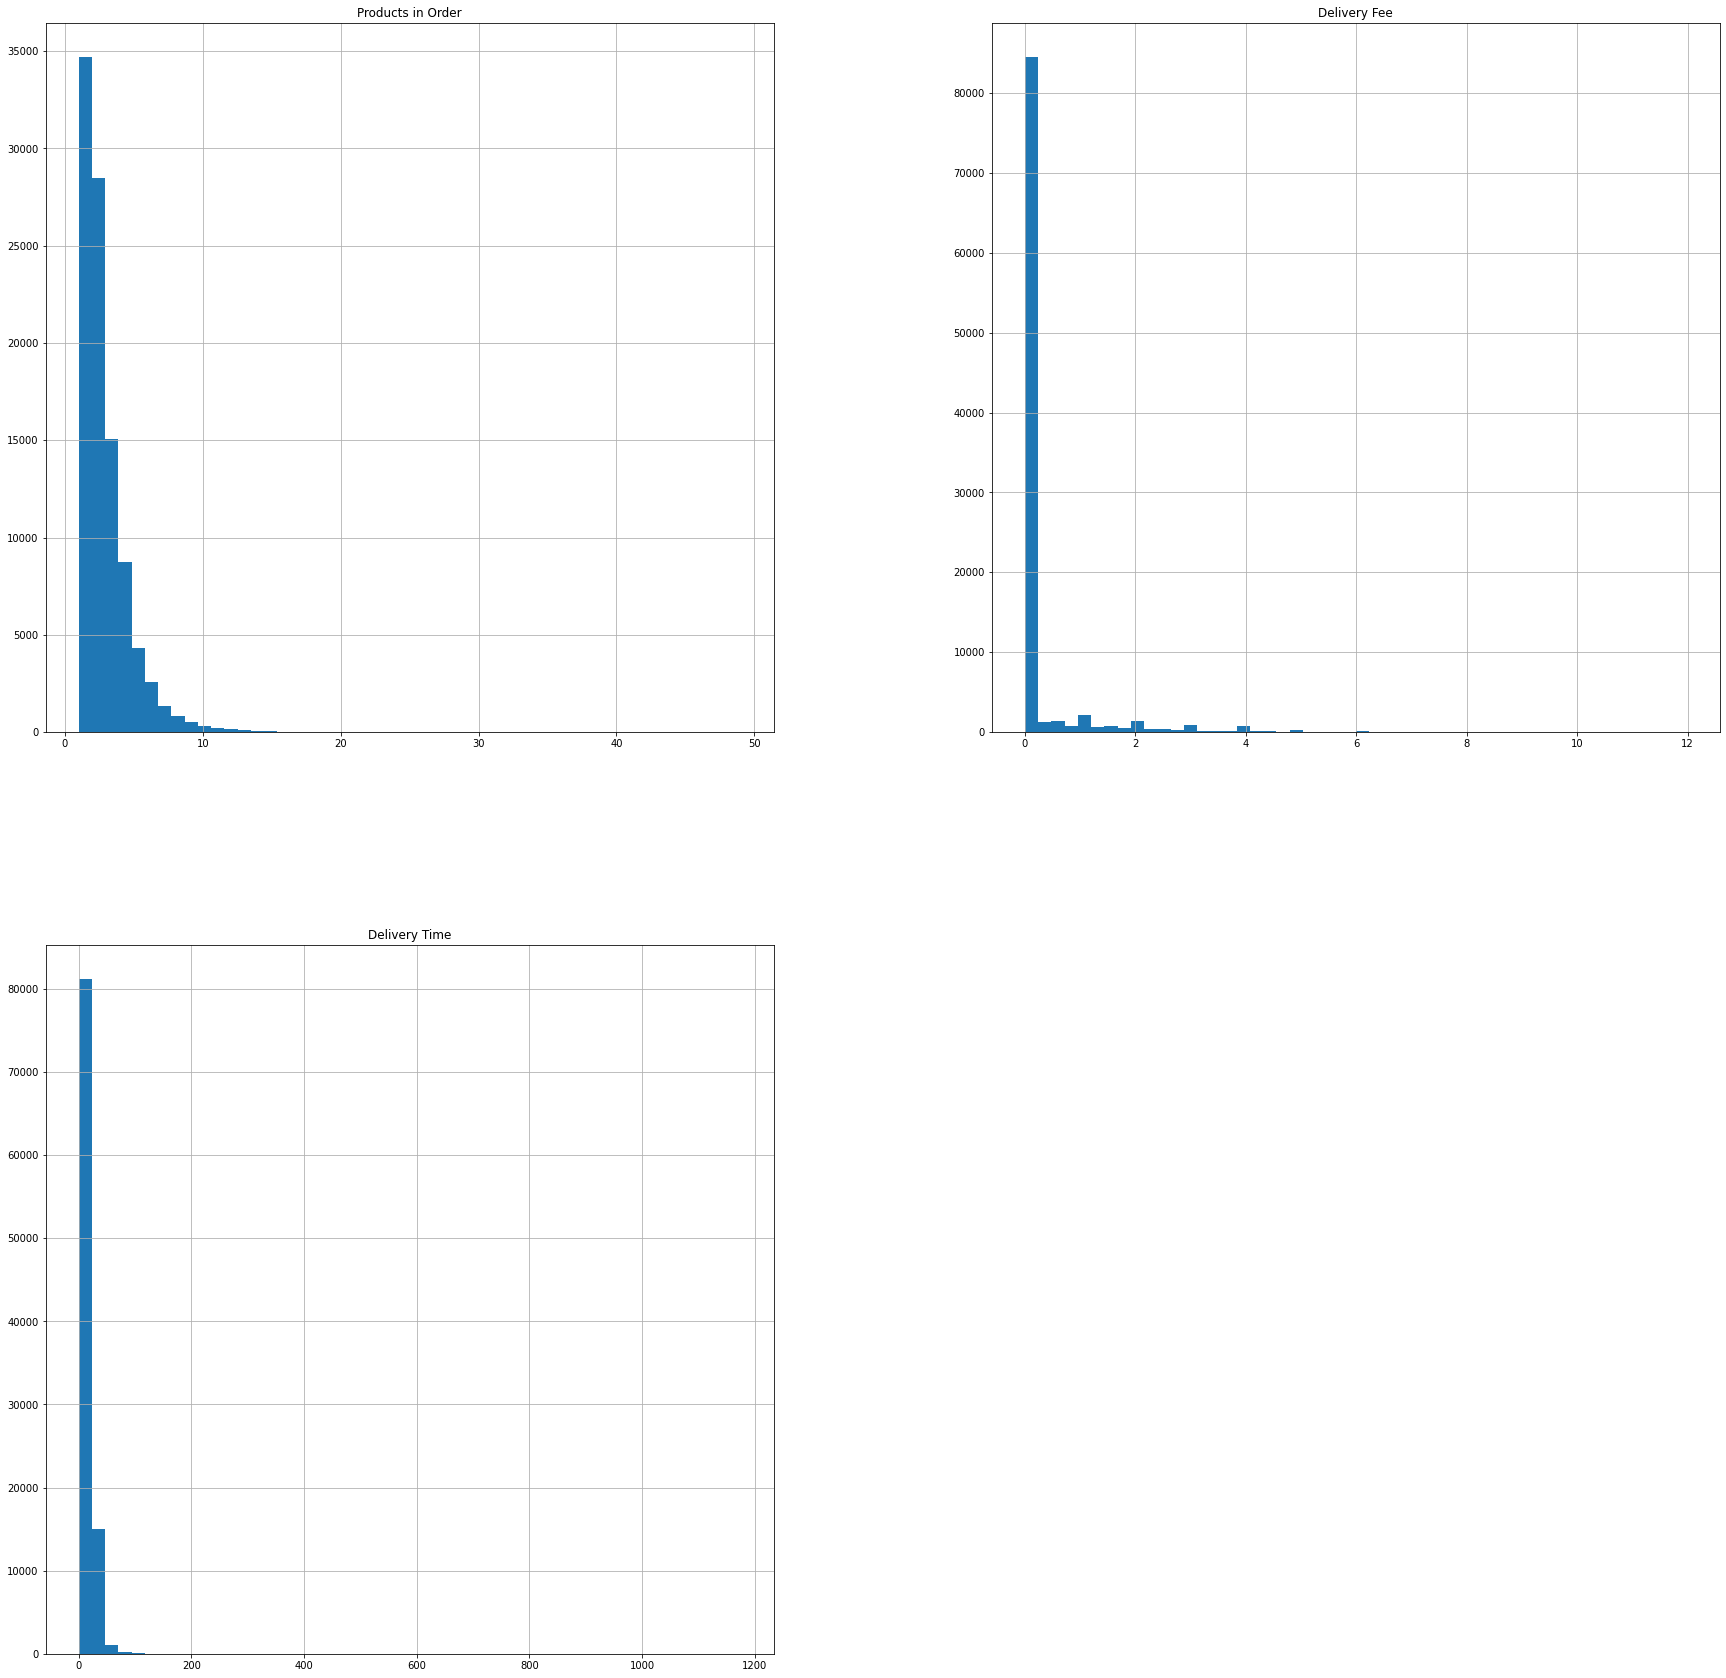

In [39]:
_sample.hist(bins=50, figsize=(30,30))
plt.show()

In [40]:
_sample['Card Issuer'].value_counts()

BANCO COMERCIAL PORTUGUES S.A.    17630
CAIXA GERAL DE DEPOSITOS S.A.      9595
BANCO SANTANDER TOTTA S.A.         8292
NOVO BANCO S.A.                    6333
CAIXA GERAL DE DEPOSITOS SA        4163
                                  ...  
BANCO DE CHILE                        1
121 FINANCIAL CREDIT UNION            1
FIO BANKA A.S.                        1
BANCO DE SABADELL S.A.                1
BANQUE CHAABI DU MAROC                1
Name: Card Issuer, Length: 639, dtype: int64

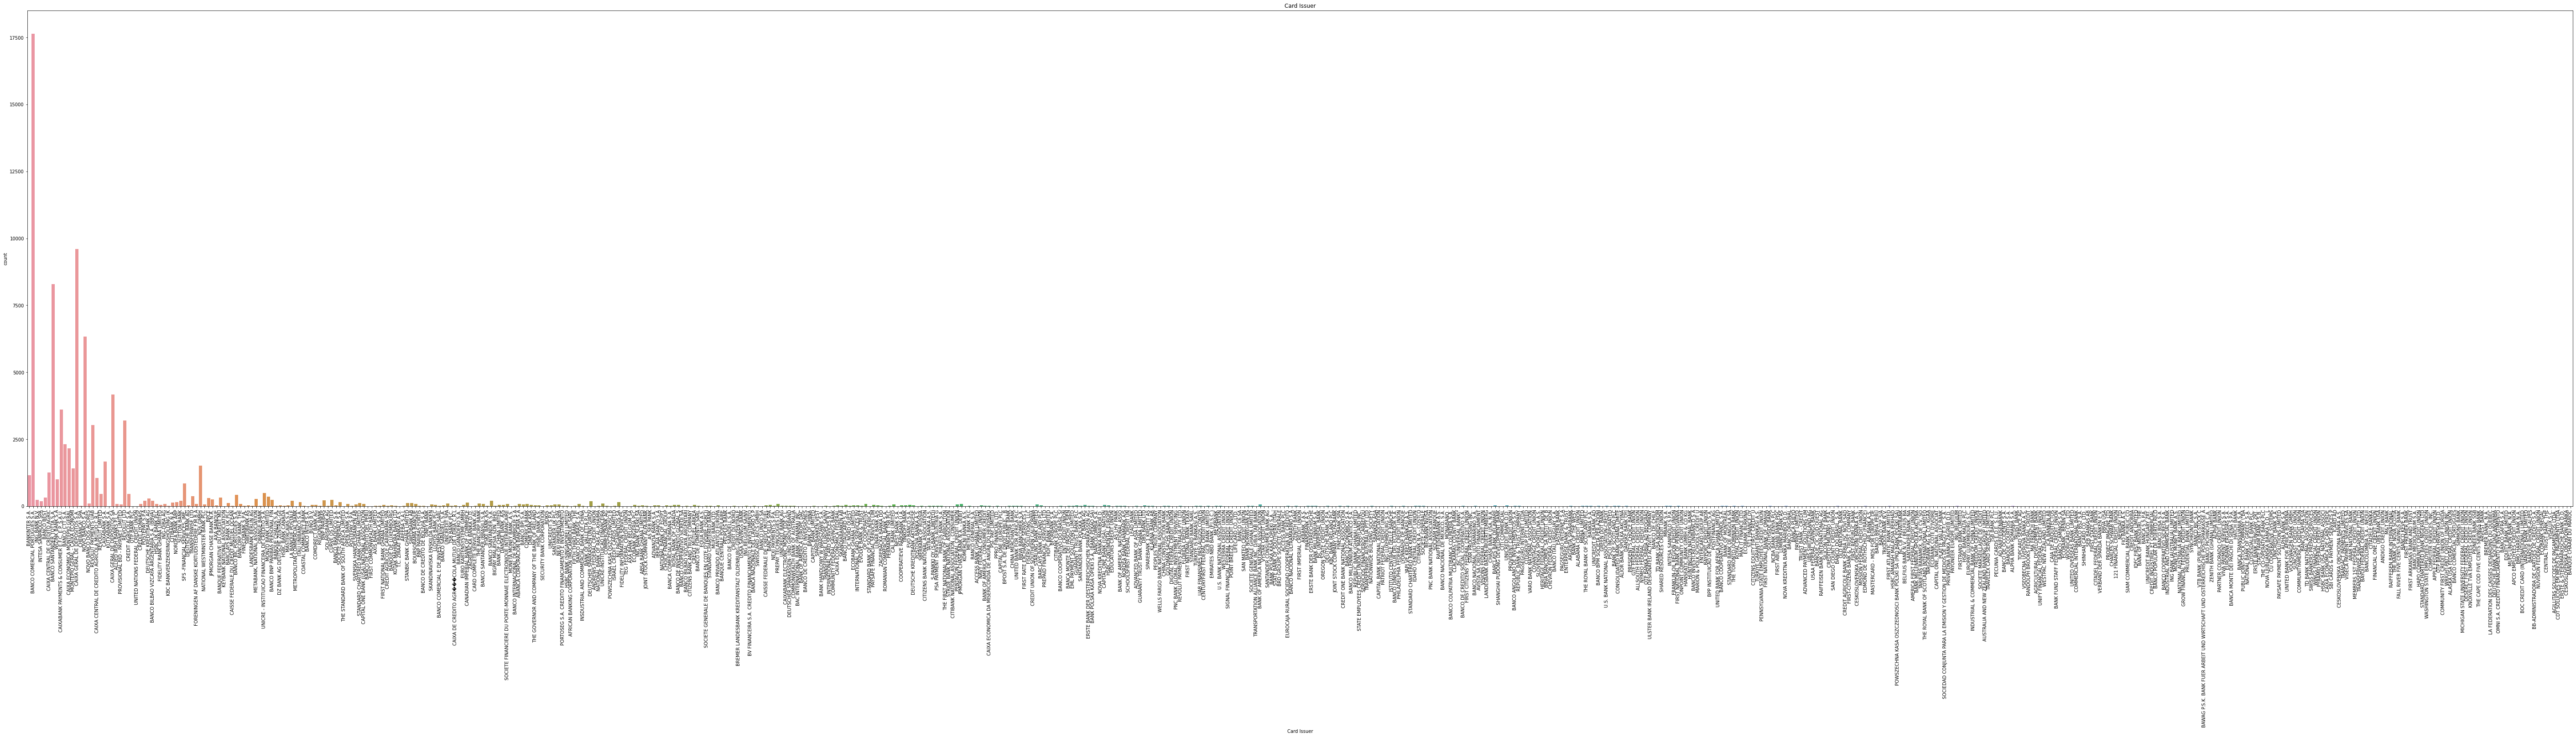

In [44]:
plt.figure(figsize=(100,20))
sns.countplot(x=_sample['Card Issuer'])
plt.xticks(rotation=90)
plt.title('Card Issuer')
plt.show()

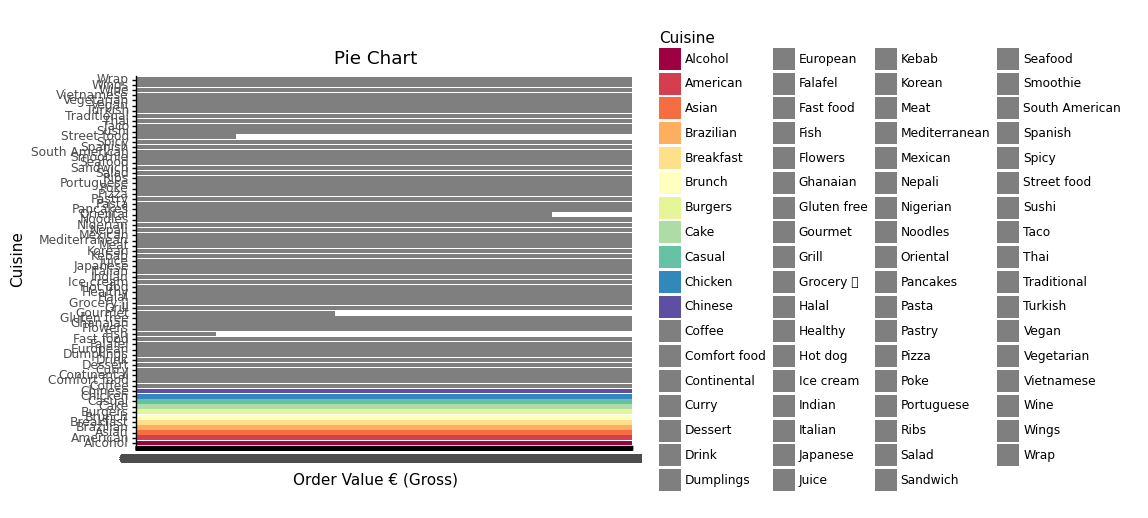

<ggplot: (8780376635025)>

In [45]:
plot = (ggplot(_sample, aes(x='Cuisine', y='Order Value € (Gross)', fill='Cuisine')) + geom_col() + coord_flip() + scale_fill_brewer(type='div', palette='Spectral') + theme_classic() + ggtitle('Pie Chart'))

display(plot)

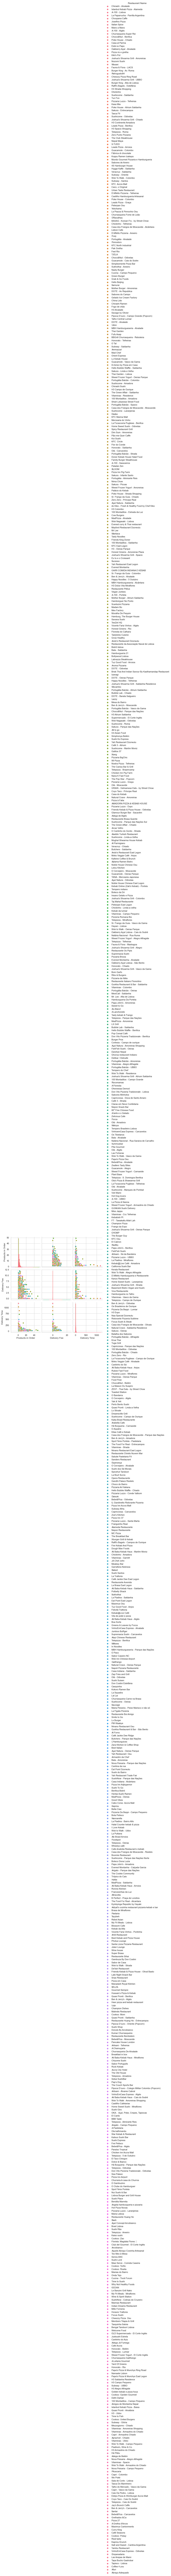

In [48]:
figsize=(15,10)
sns.pairplot(_sample, hue='Restaurant Name')
plt.show()

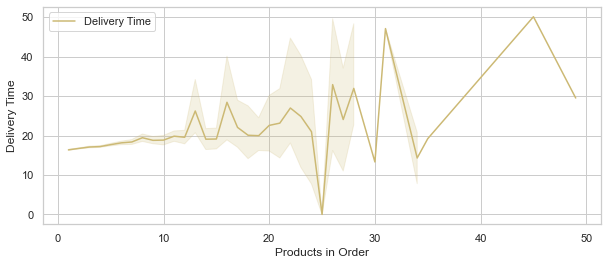

In [51]:
plt.figure(figsize=(10,4))
sns.lineplot('Products in Order', 'Delivery Time', data=_sample, color='y', label='Delivery Time')
plt.legend()
plt.show()